     0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2  429   49  481  111  111  146  8.602325  0.651162  1  430  ...  14.030257   
3  414  350  481  370  208  158  8.306624  0.424645  1  340  ...   2.789577   
4  318  359   20  218  317  301  8.124038  0.767304  1  212  ...   1.886560   

         45         46         47         48         49         50         51  \
0  0.870542   1.962937   7.466666  11.547794   8.822916   9.046424   7.895535   
1  7.168680   2.885415  12.413973  10.260494  10.091351   9.270888   3.173994   
2  0.394970   8.160625  12.592059   8.937577   2.265191  11.255721  12.794841   
3  6.416708  10.549814  11.456437   6.468099   2.519049   0.258284   9.317696   
4  1.919999   2.268203   0.149421   4.105907  10.416291   6.816217   8.586960   

          52     target  
0  11.010677

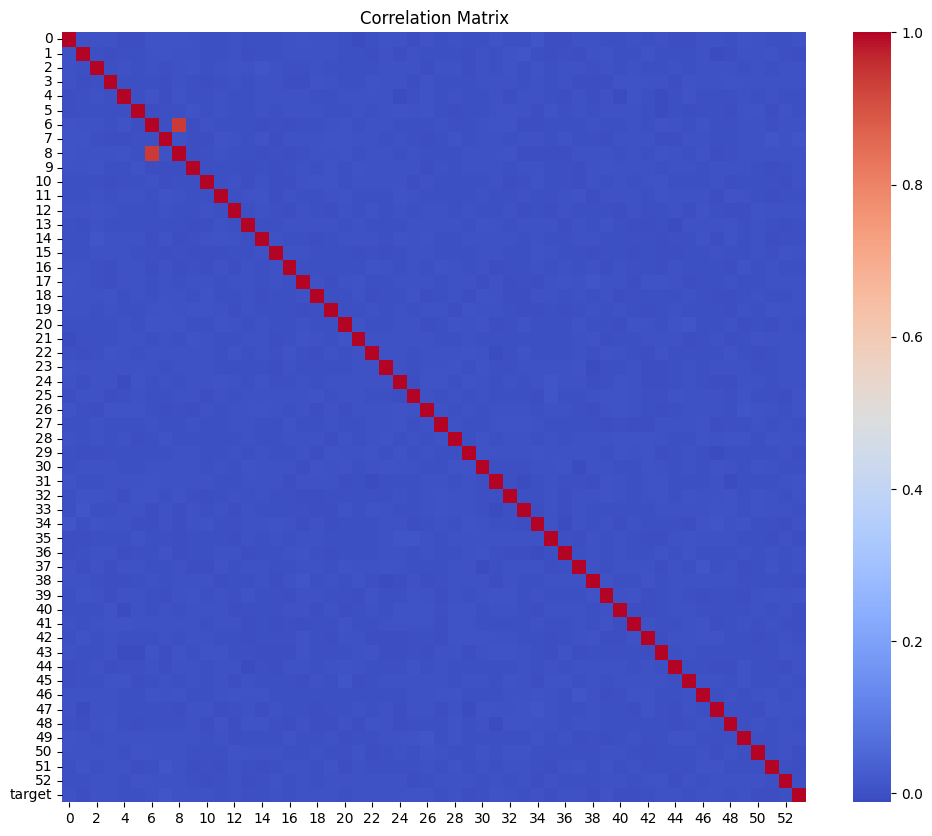

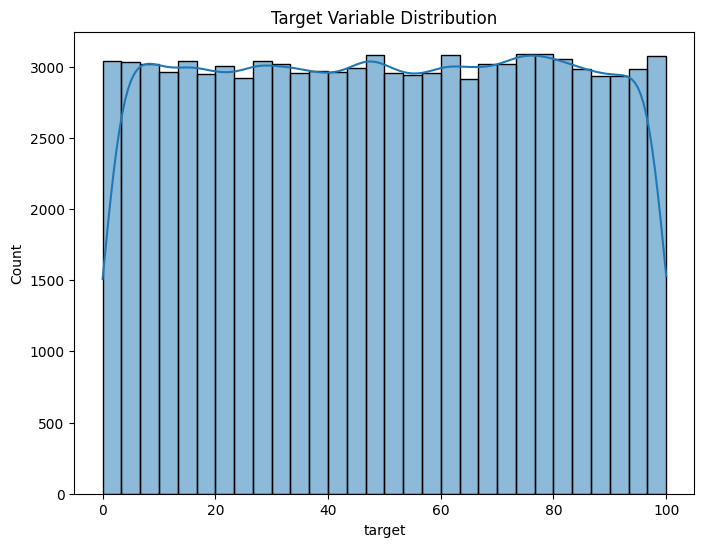

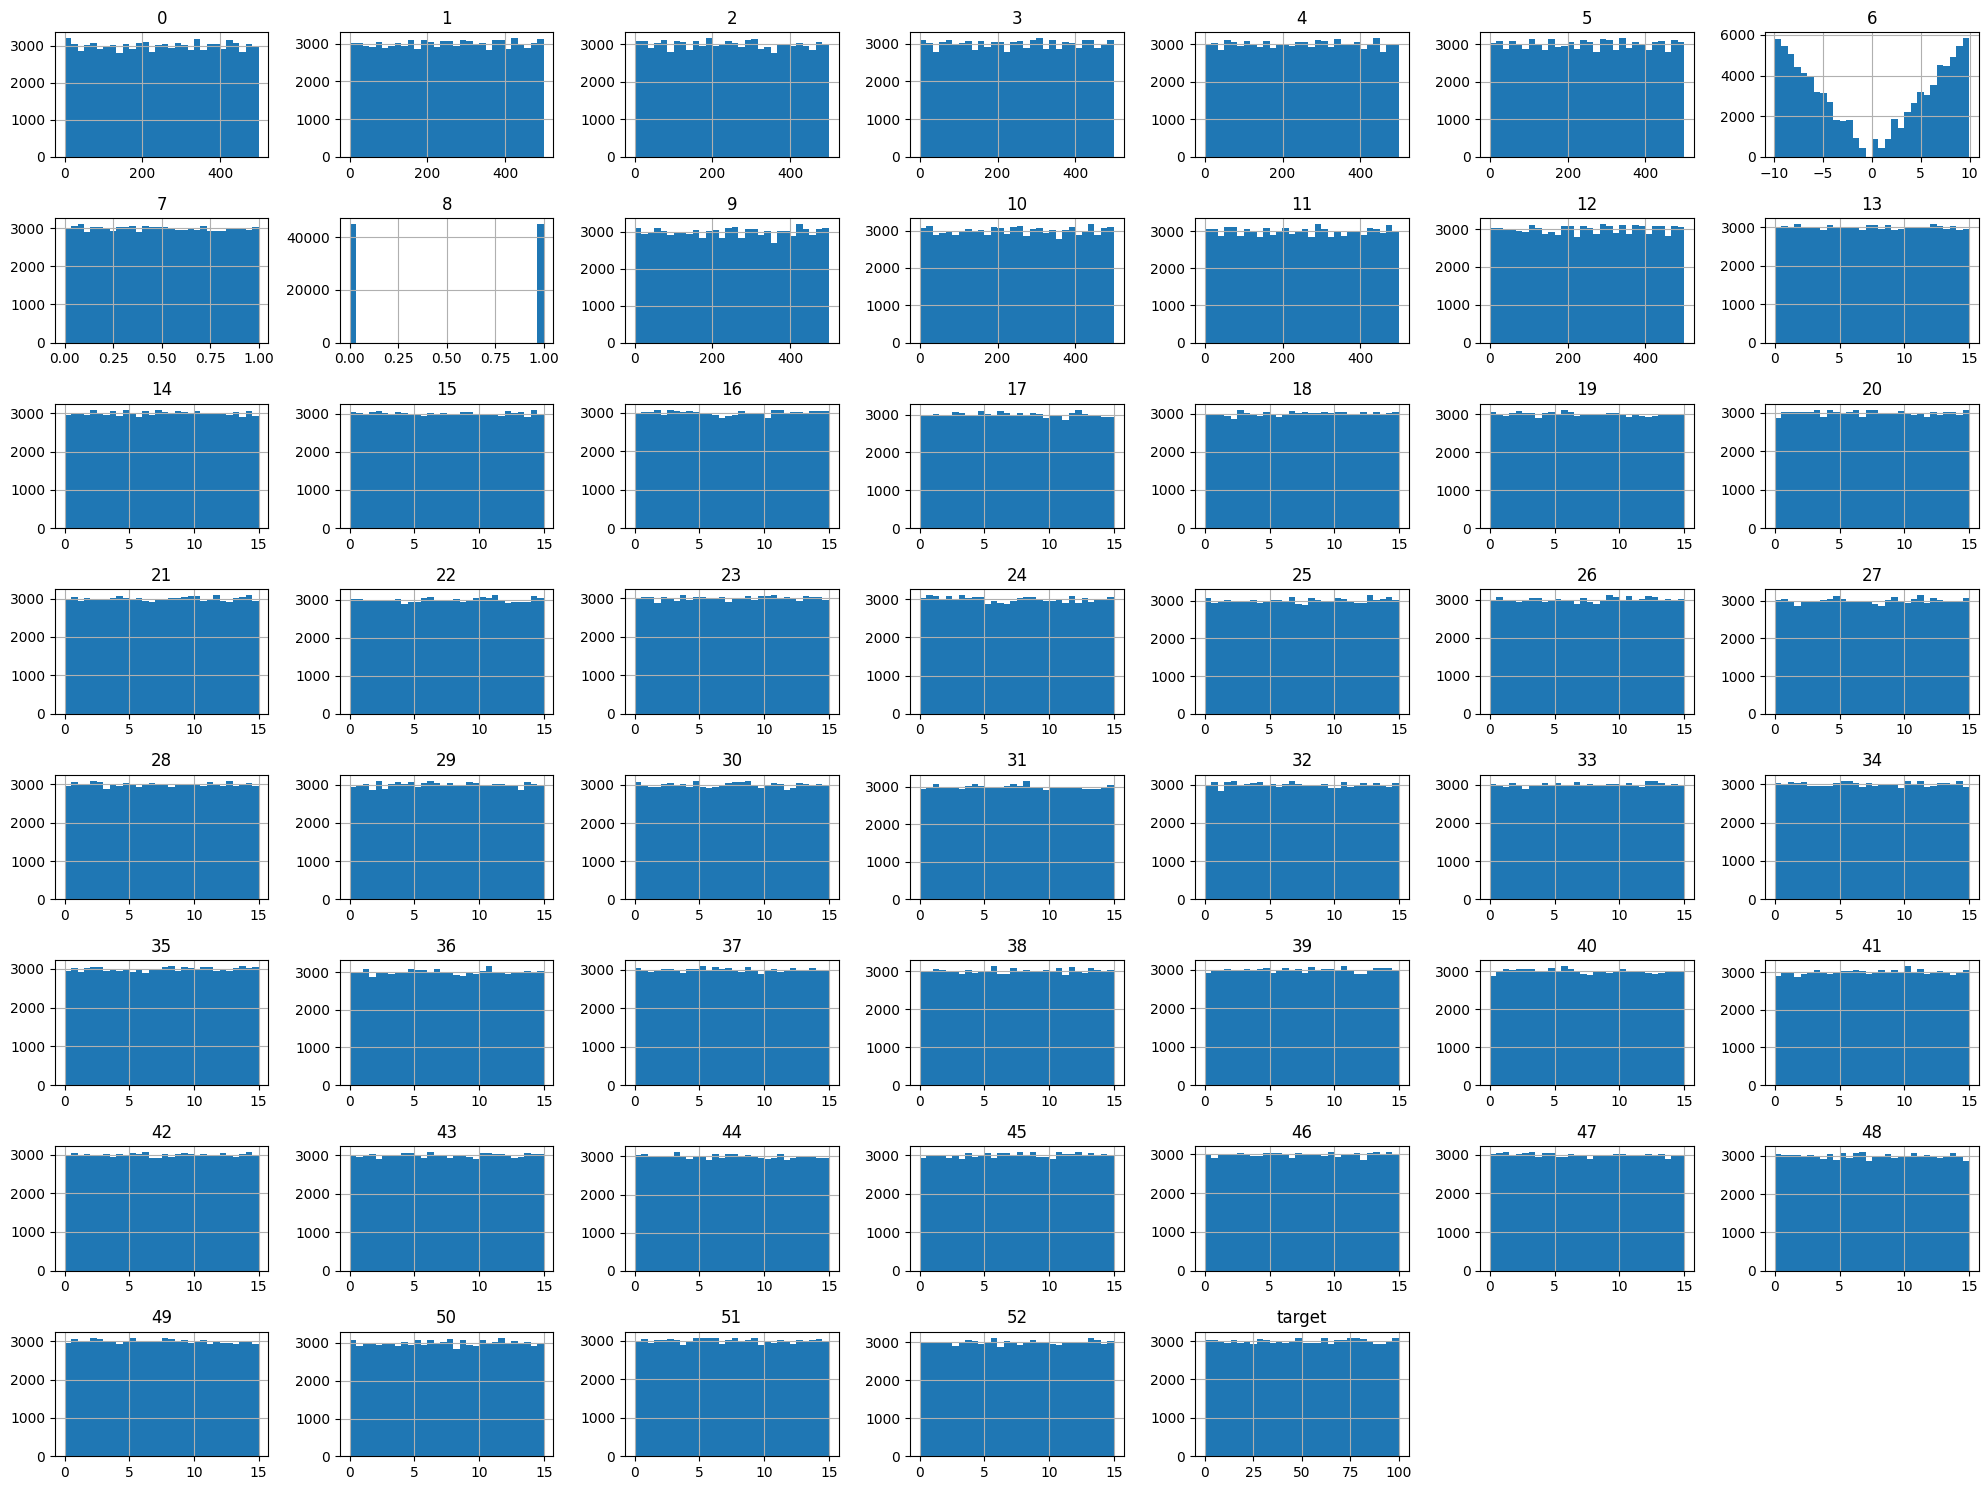

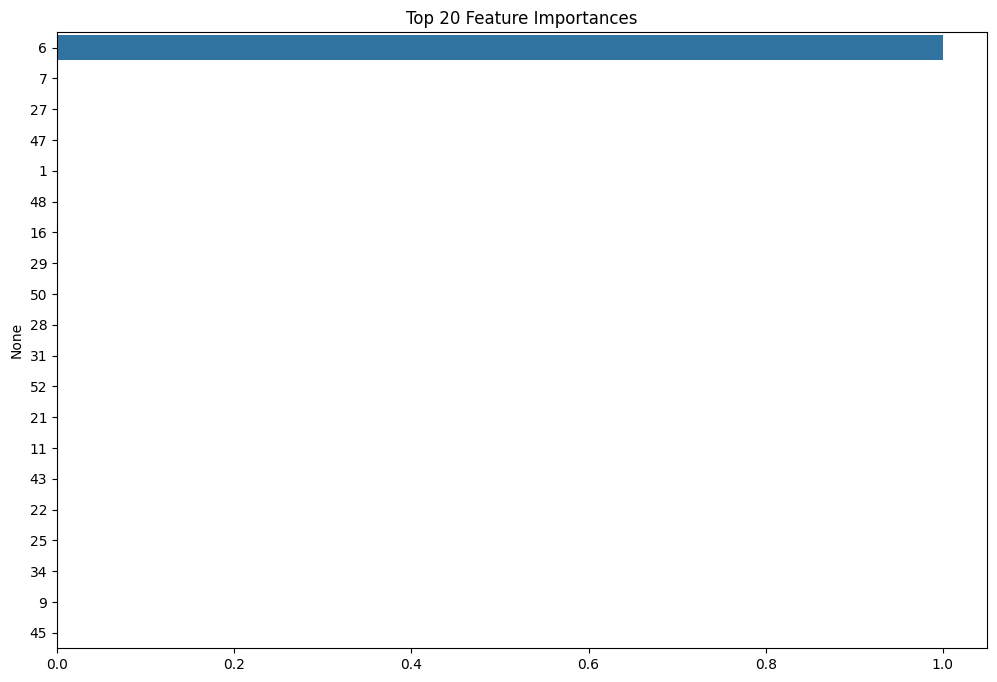

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/train.csv')

print(train.head())

print(train.describe())

print(train.isnull().sum())

plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(train['target'], bins=30, kde=True)
plt.title('Target Variable Distribution')
plt.show()

train.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

from sklearn.ensemble import RandomForestRegressor

X = train.drop('target', axis=1)
y = train['target']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,8))
sns.barplot(x=importances[indices][:20], y=X.columns[indices][:20])
plt.title('Top 20 Feature Importances')
plt.show()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=predictions, alpha=0.3)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()


NameError: name 'y_val' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy_predictions = dummy.predict(X_val)
dummy_rmse = np.sqrt(mean_squared_error(y_val, dummy_predictions))
print(f'Dummy RMSE: {dummy_rmse}')

# Ваше RMSE должно быть значительно ниже
assert rmse < dummy_rmse, "Модель не лучше, чем простая модель среднего значения."


In [ ]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s [%(levelname)s] %(message)s',
    handlers=[
        logging.StreamHandler()
    ]
)

logging.info("Начало обучения модели.")
logging.error("Произошла ошибка при обучении модели.")
